# Линейная регрессия и стохастический градиентный спуск

Прогнозирование выручки компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Реализация

**1. Загрузка [данных](http://www-bcf.usc.edu/~gareth/ISL/data.html) из файла в объект pandas DataFrame**

In [1]:
import pandas as pd
adver_data = pd.read_csv('2. Линейная регрессия и стохастический градиентный спуск.csv')

**Первые 5 записей набора данных**

In [2]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Статистика признаков в наборе данных.**

In [3]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создадим массивы признаков *X* из столбцов TV, Radio и Newspaper и ответов *y* - из столбца Sales.**

In [4]:
import numpy as np
X = np.array(adver_data.values[:,0:3])
y = np.array(adver_data.values[:,3])

**Отмасштабируем столбцы матрицы признаков *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.**

In [5]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

In [6]:
X = (X-means)/stds

**Добавим к матрице признаков *X* столбец из единиц. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [7]:
n = X.shape[0]
ones = np.ones(n).reshape(n, 1)

X = np.hstack((ones, X))

**2. Реализуем функцию *mserror* определения среднеквадратичной ошибки прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [8]:
def mserror(y, y_pred):
    return np.mean((y - y_pred)**2)

**Пример вычисления среднеквадратичной ошибки прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке.**

In [9]:
y_med = np.median(y)
answer1 = mserror(y=y, y_pred=y_med)
print(round(answer1, 3))

28.346


**3. Реализуем функцию *normal_equation*, которая по заданным матрицам *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [10]:
def normal_equation(X, y):
    return np.linalg.solve(np.dot(X.transpose(),X),np.dot(X.transpose(),y))
    #return np.dot(np.linalg.inv(np.dot(X.transpose(),X)), np.dot(X.transpose(),y))

In [11]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**В случае средних инвестиций в рекламу по ТВ, радио и в газетах (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper), линейная модель с весами, найденными с помощью нормального уравнения, предсказывает следующие продажи:**

In [12]:
answer2 = np.sum(np.array([1, 0, 0, 0])*norm_eq_weights)
print(round(answer2, 3))

14.023


**4. Функция *linear_prediction*, принимает на вход матрицу признаков *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [13]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения.**

In [14]:
y_pred = linear_prediction(X=X, w=norm_eq_weights)
answer3 = mserror(y=y, y_pred=y_pred)
print(round(answer3, 3))

2.784


**5. Функция *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция принимает матрицу признаков *X*, вектора ответов *y* и вектора весов *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов.**

__Стохастический градиентный спуск__: 

$$ w^t=w^{t-1}-\eta_t\nabla Q\left(w^{t-1},\ \left\{x_i\right\}\right)$$

Выражение для $j$-ой компоненты градиента:

$$\frac{\partial Q}{\partial w_j}=\frac{2}{\ell}x^j\left(\left\langle w\middle| x\right\rangle-y\right)$$

In [26]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    return w - eta * 2 / X.shape[0] * X[train_ind] * (np.dot(X[train_ind], w) - y[train_ind])

**6. Функция *stochastic_gradient_descent* реализует стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор записывается текущее значение среднеквадратичной ошибки. Функция возвращает вектор весов $w$, а также вектор ошибок.**

In [29]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа (номер объекта, который будет менять веса), 
    # а для воспроизводимости этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w_new = stochastic_gradient_step(X=X, y=y, w=w, train_ind=random_ind, eta=eta)
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        y_pred = linear_prediction(X, w)
        errors.append(mserror(y, y_pred))
        iter_num += 1
        
    return w, errors

**Реализация функции стохастического градиентного спуска для линейной регрессии для $10^5$. Вектор начальных весов *w_init* состоит из нулей. Параметры  *eta* и *seed* равным их значениям по умолчанию (*eta*=0.01, *seed*=42).**

In [40]:
%%time
w_init = np.zeros(X.shape[1])
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, max_iter=1e5)

Wall time: 1.89 s


**Ошибка на первых 50 итерациях стохастического градиентного спуска не обязательно уменьшается на каждой итерации, что видно из графика.**

Populating the interactive namespace from numpy and matplotlib


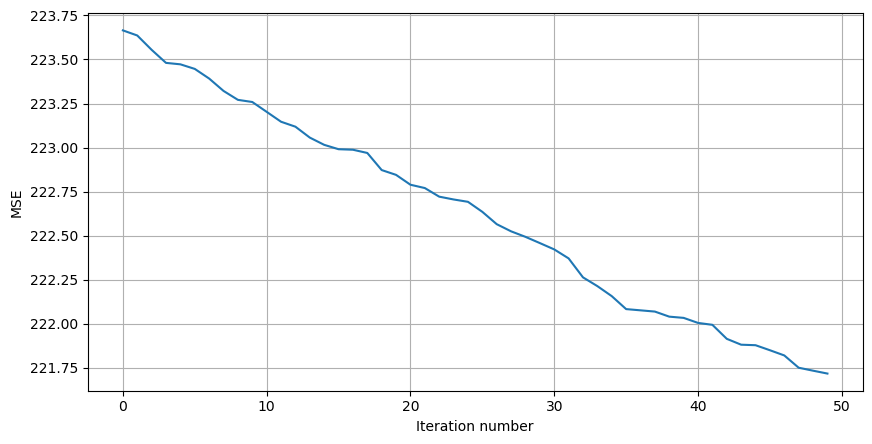

In [52]:
%pylab inline
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')
plt.grid(True)
plt.show()

**Зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видно, что алгоритм сходится.**

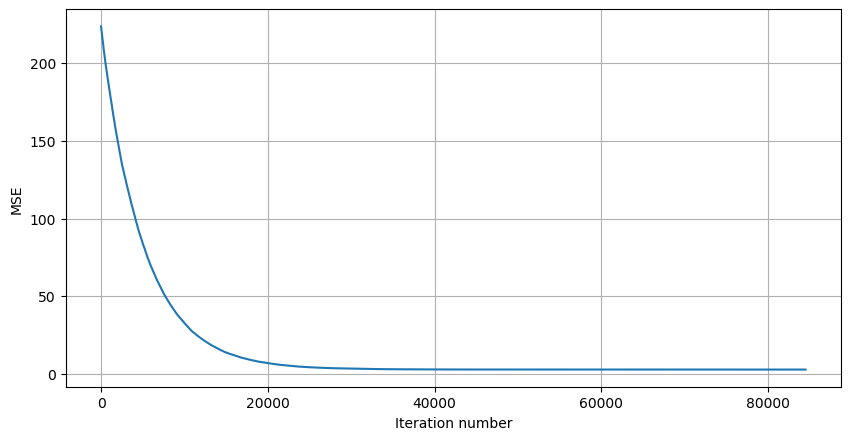

In [55]:
ig, bx = plt.subplots(figsize=(10,5), dpi=100)
bx.plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')
plt.grid(True)
plt.show()

**Вектор весов, к которому сошелся метод.**

In [59]:
print(stoch_grad_desc_weights)

[ 1.40190566e+01  3.91069256e+00  2.78209808e+00 -8.10462217e-03]


**Среднеквадратичная ошибку последней итерации.**

In [61]:
print(stoch_errors_by_iter[-1])

2.7844125884067035


**Среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска.**

In [63]:
answer4 = mserror(y=y, y_pred=linear_prediction(X=X, w=stoch_grad_desc_weights))
print(round(answer4, 3))

2.784
